### Project Ensemble Techniques


**Data Description**: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

**Domain: Banking**

**Context**:Leveraging customer information is paramount formost businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.

#### Attribute Information:
* **age** :(numeric)

* **job** : type of job (categorical:'admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')

* **marital** : marital status (categorical: 'divorced','married','single','unknown';note: 'divorced' means divorced or widowed)

* **education** (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

* **default**: has credit in default? (categorical: 'no','yes','unknown')

* **balance**: average yearly balance, in euros (numeric)

* **housing**: has housing loan? (categorical: 'no','yes','unknown')

* **loan**: has personal loan? (categorical: 'no','yes','unknown')

* **contact**: contact communication type (categorical: 'cellular','telephone')

* **day**: last contact day of the month (numeric 1 -31)

* **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

* **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet,the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

* **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)

* **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

* **previous**: number of contacts performed before this campaign and for this client (numeric)

* **poutcome**: outcome of the previous marketing campaign (categorical:'failure','nonexistent','success')

* **target**: has the client subscribed a term deposit? (binary: "yes","no")

### Import the necessary libraries

In [1]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Windows-10-10.0.18362-SP0
Python 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
NumPy 1.18.1
SciPy 1.4.1
Scikit-Learn 0.23.0


In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt       
%matplotlib inline 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier

### Read the data as a data frame

In [68]:
bankdf = pd.read_csv('bank-full.csv')

In [47]:
bankdf_cat = bankdf.copy()

### Perform basic EDA which should include the following and print out your insights at every step.

a.Shape of the data 

b.Data type of each attribute

c.Checking the presence of missing values

d.5 Point summary of numerical attributes

e.Checking the presence of outliers

In [48]:
bankdf.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [49]:
print ("Rows     : " ,bankdf.shape[0])
print ("Columns  : " ,bankdf.shape[1])
print ("\nFeatures : \n" ,bankdf.columns.tolist())
print ("\nUnique values :  \n",bankdf.nunique())
print("\n DataType : \n",bankdf.dtypes)

Rows     :  45211
Columns  :  17

Features : 
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'Target']

Unique values :  
 age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

 DataType : 
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object


In [50]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [51]:
columns = bankdf.loc[:, bankdf.dtypes == 'object'].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} are \n{bankdf[cols].unique()}\n')

Unique values for job are 
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values for marital are 
['married' 'single' 'divorced']

Unique values for education are 
['tertiary' 'secondary' 'unknown' 'primary']

Unique values for default are 
['no' 'yes']

Unique values for housing are 
['yes' 'no']

Unique values for loan are 
['no' 'yes']

Unique values for contact are 
['unknown' 'cellular' 'telephone']

Unique values for month are 
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values for poutcome are 
['unknown' 'failure' 'other' 'success']

Unique values for Target are 
['no' 'yes']



In [52]:
for feature in bankdf.columns: # Loop through all columns in the dataframe
    if bankdf[feature].dtype == 'object': # Only apply for columns with categorical strings
        bankdf[feature] = pd.Categorical(bankdf[feature])# Replace strings with an integer
bankdf.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [53]:
bankdf.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

In [54]:
print(bankdf.job.value_counts())
print(bankdf.marital.value_counts())
print(bankdf.education.value_counts())
print(bankdf.default.value_counts())
print(bankdf.housing.value_counts())
print(bankdf.loan.value_counts())
print(bankdf.contact.value_counts())
print(bankdf.month.value_counts())
print(bankdf.poutcome.value_counts())
print(bankdf.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

### Univariate and BiVariate Analysis

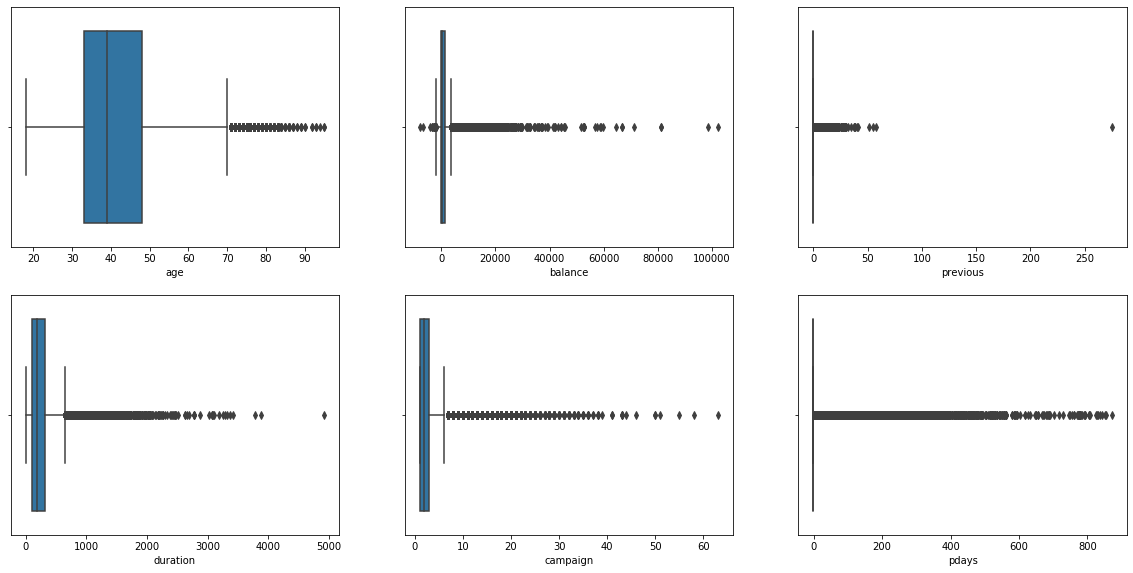

In [55]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(bankdf['age'])

plt.subplot(3,3,2)
sns.boxplot(bankdf['balance'])

plt.subplot(3,3,3)
sns.boxplot(bankdf['previous'])

plt.subplot(3,3,4)
sns.boxplot(bankdf['duration'])

plt.subplot(3,3,5)
sns.boxplot(bankdf['campaign'])

plt.subplot(3,3,6)
sns.boxplot(bankdf['pdays'])

plt.show()

*All the above columns have outliers.*

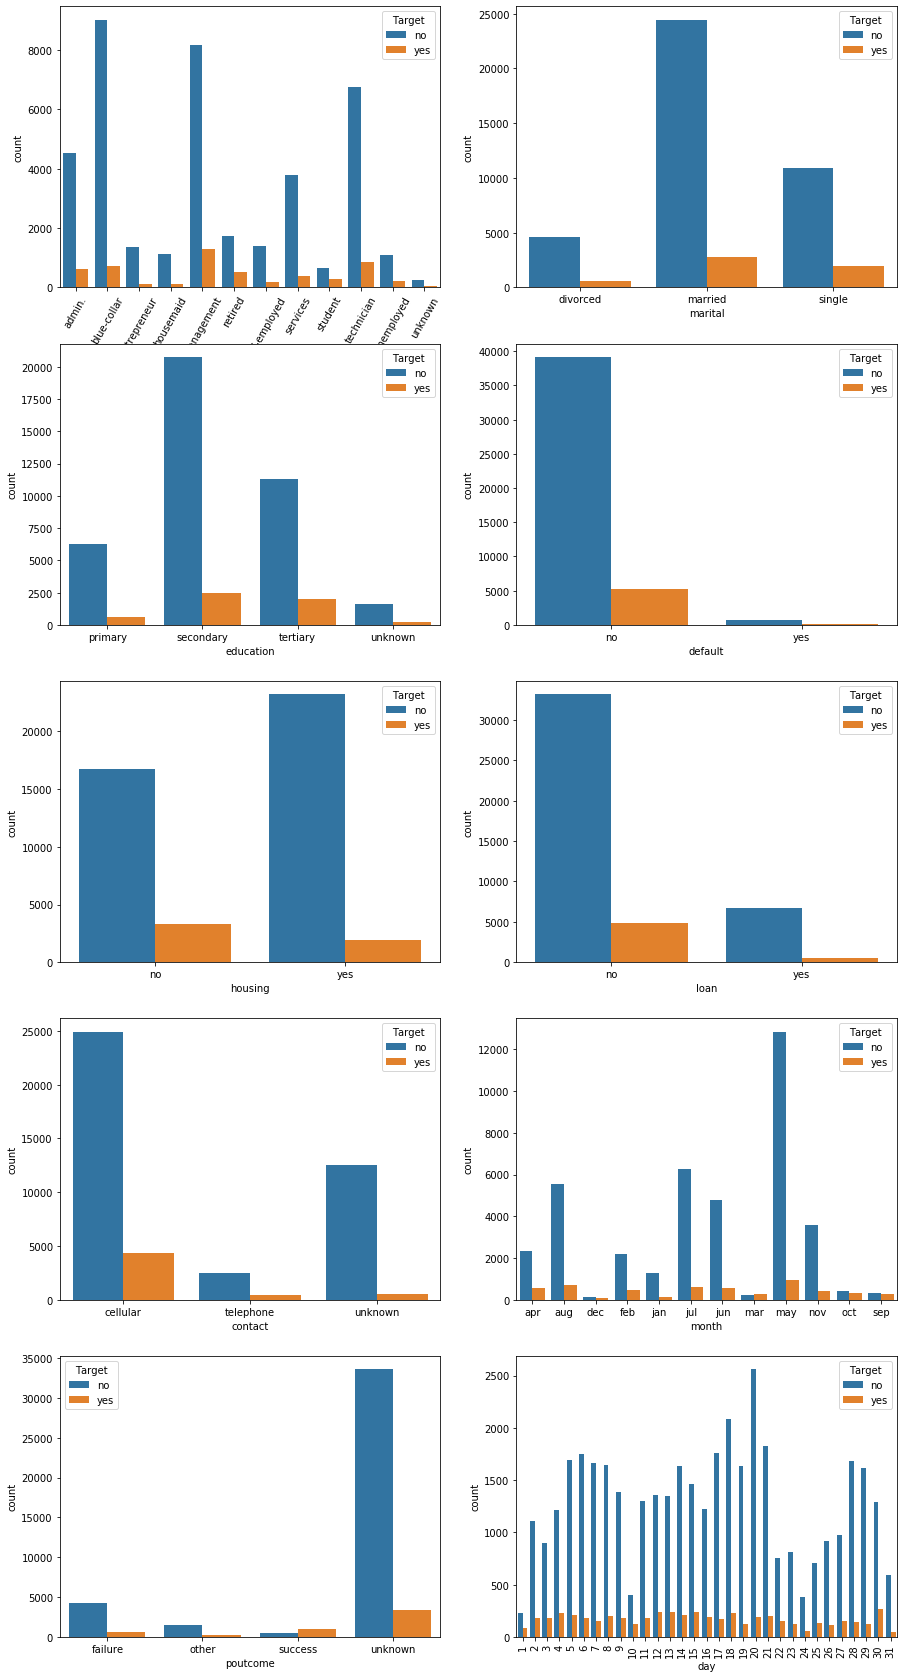

In [13]:
plt.figure(figsize= (15,30))

plt.subplot(5,2,1)
sns.countplot(x = 'job', hue ='Target', data = bankdf)
plt.xlabel('job')
plt.xticks(rotation = 60)

plt.subplot(5,2,2)
sns.countplot(x = 'marital', hue ='Target', data = bankdf)
plt.xlabel('marital')

plt.subplot(5,2,3)
sns.countplot(x = 'education', hue ='Target', data = bankdf,orient='v')
plt.xlabel('education')

plt.subplot(5,2,4)
sns.countplot(x = 'default', hue ='Target', data = bankdf)
plt.xlabel('default')

plt.subplot(5,2,5)
sns.countplot(x = 'housing', hue ='Target', data = bankdf)
plt.xlabel('housing')

plt.subplot(5,2,6)
sns.countplot(x = 'loan', hue ='Target', data = bankdf)
plt.xlabel('loan')

plt.subplot(5,2,7)
sns.countplot(x = 'contact', hue ='Target', data = bankdf)
plt.xlabel('contact')

plt.subplot(5,2,8)
sns.countplot(x = 'month', hue ='Target', data = bankdf,orient='h')
plt.xlabel('month')

plt.subplot(5,2,9)
sns.countplot(x = 'poutcome', hue ='Target', data = bankdf,orient='h')
plt.xlabel('poutcome')

plt.subplot(5,2,10)
sns.countplot(x = 'day', hue ='Target', data = bankdf,orient='h')
plt.xlabel('day')
plt.xticks(rotation = 90)

plt.show()


On the martial, Customers who are married have higher subscription rate.
Celluar Communication type have higher subscription rate.
Customers without Loan have higher subscription rate.
Customers with Higher Education have higher subscription rate.


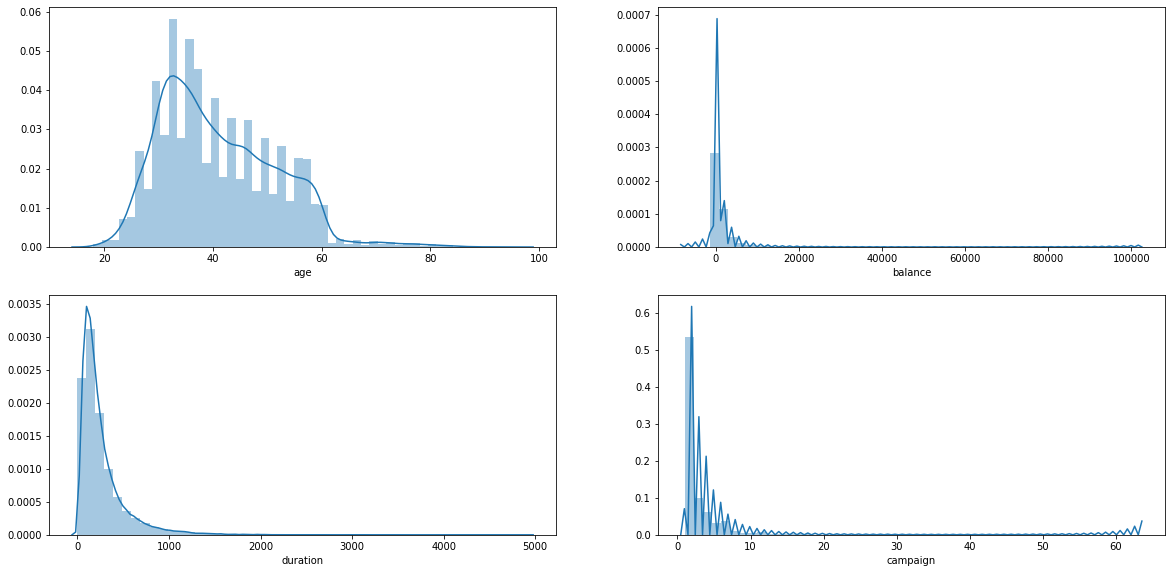

In [14]:
plt.figure(figsize= (20,15))

plt.subplot(3,2,1)
sns.distplot(bankdf.age)

plt.subplot(3,2,2)
sns.distplot(bankdf.balance)

plt.subplot(3,2,3)
sns.distplot(bankdf.duration)

plt.subplot(3,2,4)
sns.distplot(bankdf.campaign)

plt.show()

### Checking the distribution of target variable

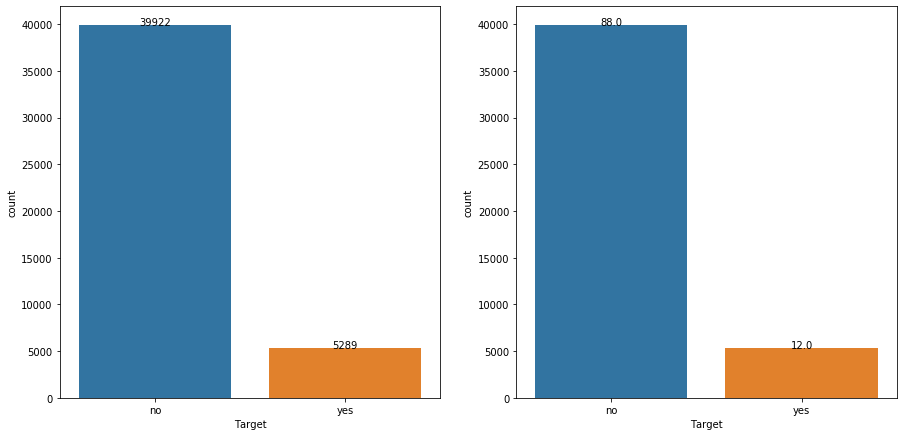

In [15]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
ax=sns.countplot(bankdf.Target)
total = int(len(bankdf)) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1}'.format(height),
            ha="center")  

ax = fig.add_subplot(122)
ax=sns.countplot(bankdf.Target)
total = int(len(bankdf)) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1}'.format(round((height/total)* 100),2),
            ha="center")  

Out of 45211 cases, only 5289 (12%) are the cases where the client has subscribed to the term deposit.

In [56]:
bankdf['default'] = bankdf['default'].map({'yes': 1, 'no': 0}).astype(int)
bankdf['housing'] = bankdf['housing'].map({'yes': 1, 'no': 0}).astype(int)
bankdf['month'] = bankdf['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
                            'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}).astype(int)
bankdf['education'] = bankdf['education'].map({'unknown': -1, 'primary': 1, 'secondary': 2, 'tertiary': 3}).astype(int)
bankdf['loan'] = bankdf['loan'].map({'yes': 1, 'no': 0}).astype(int)
bankdf['Target'] = bankdf['Target'].map({'yes': 1, 'no': 0}).astype(int)
oneHotCols=['job', 'marital', 'contact','poutcome']
bankdf=pd.get_dummies(bankdf, columns=oneHotCols)
bankdf.head(10)

age  education  default  balance  housing  loan  day  month  duration  \
0   58          3        0     2143        1     0    5      5       261   
1   44          2        0       29        1     0    5      5       151   
2   33          2        0        2        1     1    5      5        76   
3   47         -1        0     1506        1     0    5      5        92   
4   33         -1        0        1        0     0    5      5       198   
5   35          3        0      231        1     0    5      5       139   
6   28          3        0      447        1     1    5      5       217   
7   42          3        1        2        1     0    5      5       380   
8   58          1        0      121        1     0    5      5        50   
9   43          2        0      593        1     0    5      5        55   

   campaign  ...  marital_divorced  marital_married  marital_single  \
0         1  ...                 0                1               0   
1         1  ...                 0                0               1   
2         1  ...                 0                1               0   
3         1  ...                 0                1               0   
4         1  ...                 0                0               1   
5         1  ...                 0                1               0   
6         1  ...                 0                0               1   
7         1  ...                 1                0               0   
8         1  ...                 0                1               0   
9         1  ...                 0                0               1   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0                 0                  0                1                 0   
1                 0                  0                1                 0   
2                 0                  0                1                 0   
3                 0                  0                1                 0   
4                 0                  0                1                 0   
5                 0                  0                1                 0   
6                 0                  0                1                 0   
7                 0                  0                1                 0   
8                 0                  0                1                 0   
9                 0                  0                1                 0   

   poutcome_other  poutcome_success  poutcome_unknown  
0               0                 0                 1  
1               0                 0                 1  
2               0                 0                 1  
3               0                 0                 1  
4               0                 0                 1  
5               0                 0                 1  
6               0                 0                 1  
7               0                 0                 1  
8               0                 0                 1  
9               0                 0                 1  

[10 rows x 35 columns]

In [57]:
print(bankdf.default.value_counts())
print(bankdf.housing.value_counts())
print(bankdf.loan.value_counts())
print(bankdf.Target.value_counts())
print ("Rows     : " ,bankdf.shape[0])
print ("Columns  : " ,bankdf.shape[1])
print ("\nFeatures : \n" ,bankdf.columns.tolist())
print ("\nUnique values :  \n",bankdf.nunique())
print("\n DataType : \n",bankdf.dtypes)

0    44396
1      815
Name: default, dtype: int64
1    25130
0    20081
Name: housing, dtype: int64
0    37967
1     7244
Name: loan, dtype: int64
0    39922
1     5289
Name: Target, dtype: int64
Rows     :  45211
Columns  :  35

Features : 
 ['age', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'Target', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']

Unique values :  
 age                    77
education               4
default                 2
balance              7168
housing                 2
loan                    2
day                    31
month                

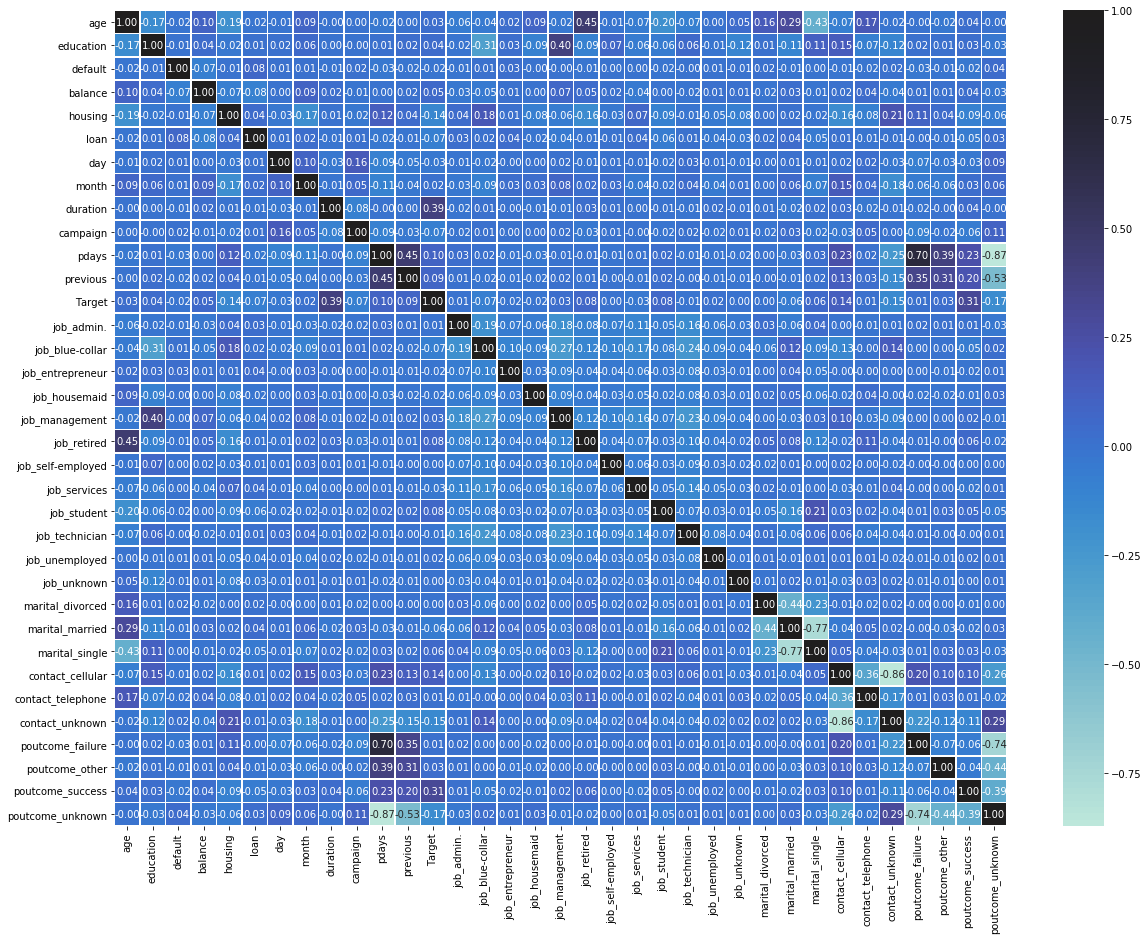

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(bankdf.corr(), annot=True, linewidths=.5, fmt= '.2f', center = 1 )  # heatmap
plt.show()

# Split Data into training and test set         

In [58]:
X = bankdf.drop("Target" , axis=1)
y = bankdf.pop("Target")

In [59]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(31647, 34) (13564, 34) (31647,) (13564,)


In [21]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train a few standard classification algorithms, note and comment on their performances across different classification metrics.

Best Score: 0.89, with Best Parameter:{'C': 0.005}

               precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.66      0.31      0.42      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564


Confusion Matrix:
 [[11706   260]
 [ 1104   494]]

Accuracy Score:
 0.9
Precision Score :
  0.66
Recall Score :
  0.31
f1 Score: 
 0.42


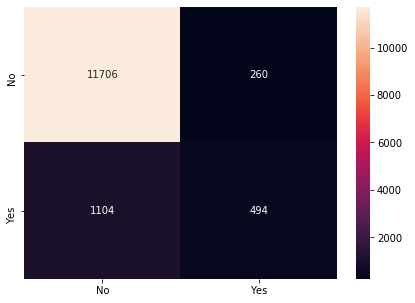

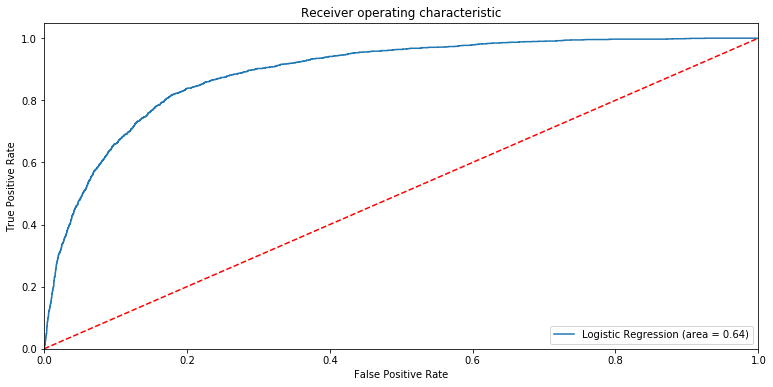

                           Accuracy  Precision  Recall    f1
Logistic Regression Model       0.9       0.66    0.31  0.42


In [22]:
# Logistic Regression Model

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = LogisticRegression()

#GridSearch Cross Validation

skfold = StratifiedKFold(n_splits=10)
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]}
clf = GridSearchCV(model,param,scoring='roc_auc',cv=skfold,verbose=0)
clf.fit(X_train,y_train)

print("Best Score: {:.2}, with Best Parameter:{}".format(clf.best_score_,clf.best_params_))

y_true,y_pred = y_test,clf.predict(X_test)

# Classification Report
print('\n {}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
pre = precision_score(y_true, y_pred, average = 'binary', pos_label = 1)
rec = recall_score(y_true, y_pred, average = 'binary', pos_label = 1)
f1 = f1_score(y_true, y_pred, average = 'binary', pos_label = 1)
print('\nAccuracy Score:\n', auc.round(2))
print('Precision Score :\n ', pre.round(2))
print('Recall Score :\n ', rec.round(2))
print('f1 Score: \n', f1.round(2))


# ROC Curve
roc_auc = roc_auc_score(y_true, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, clf.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Logistic Regression (area = {})'.\
         format(roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()


df = pd.DataFrame([auc.round(2), pre.round(2), rec.round(2), f1.round(2)], columns = ['Logistic Regression Model']).T
df.columns = ['Accuracy', 'Precision', 'Recall', 'f1']
print(df)

k-Nearest Neighbor Classifier


k-NN accuracy for train set: 1.00
k-NN accuracy for test set: 0.89

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11966
           1       0.54      0.34      0.42      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.65      0.68     13564
weighted avg       0.87      0.89      0.88     13564


Confusion Matrix:
 [[11497   469]
 [ 1047   551]]

Accuracy Score:
 0.89
Precision Score :
  0.54
Recall Score :
  0.34
f1 Score: 
 0.42


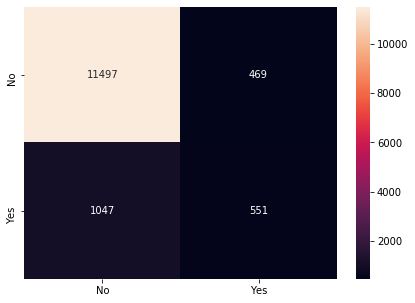

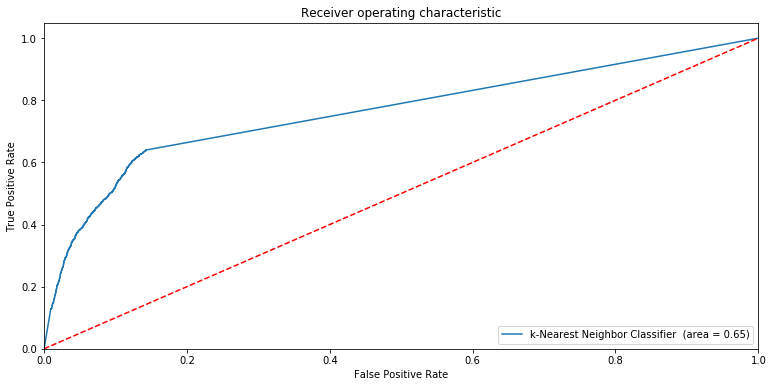

                                     Accuracy  Precision  Recall    f1
Logistic Regression Model                0.90       0.66    0.31  0.42
k-Nearest Neighbor Classifier Model      0.89       0.54    0.34  0.42


In [23]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

KNN = KNeighborsClassifier(n_neighbors=3, weights= 'distance')
KNN.fit(X_train, y_train)

print('k-Nearest Neighbor Classifier\n\n')
print('k-NN accuracy for train set: {0:.2f}'.format(KNN.score(X_train, y_train)))
print('k-NN accuracy for test set: {0:.2f}'.format(KNN.score(X_test, y_test)))

y_true, y_pred = y_test, KNN.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

auc = accuracy_score(y_true, y_pred)
pre = precision_score(y_true, y_pred, average = 'binary', pos_label = 1)
rec = recall_score(y_true, y_pred, average = 'binary', pos_label = 1)
f1 = f1_score(y_true, y_pred, average = 'binary', pos_label = 1)
print('\nAccuracy Score:\n', auc.round(2))
print('Precision Score :\n ', pre.round(2))
print('Recall Score :\n ', rec.round(2))
print('f1 Score: \n', f1.round(2))


# ROC Curve
roc_auc = roc_auc_score(y_true, KNN.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, KNN.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'k-Nearest Neighbor Classifier  (area = {})'.\
         format(roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()


df1 = pd.DataFrame([auc.round(2), pre.round(2), rec.round(2), f1.round(2)], columns = ['k-Nearest Neighbor Classifier Model']).T
df1.columns = ['Accuracy', 'Precision', 'Recall', 'f1']
df = pd.concat([df, df1])
print(df)

(31647, 34) (13564, 34) (31647,) (13564,)
Naive Bayes 


NB accuracy for train set: 0.83
NB accuracy for test set: 0.83

              precision    recall  f1-score   support

           0       0.93      0.86      0.90     11966
           1       0.34      0.53      0.42      1598

    accuracy                           0.83     13564
   macro avg       0.64      0.70      0.66     13564
weighted avg       0.86      0.83      0.84     13564


Confusion Matrix:
 [[10340  1626]
 [  747   851]]

Accuracy Score:
 0.83
Precision Score :
  0.34
Recall Score :
  0.53
f1 Score: 
 0.42


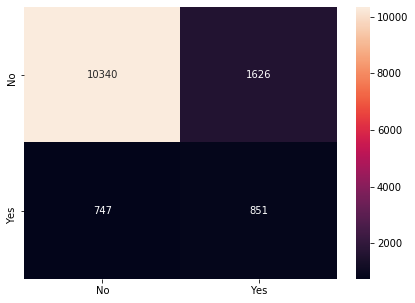

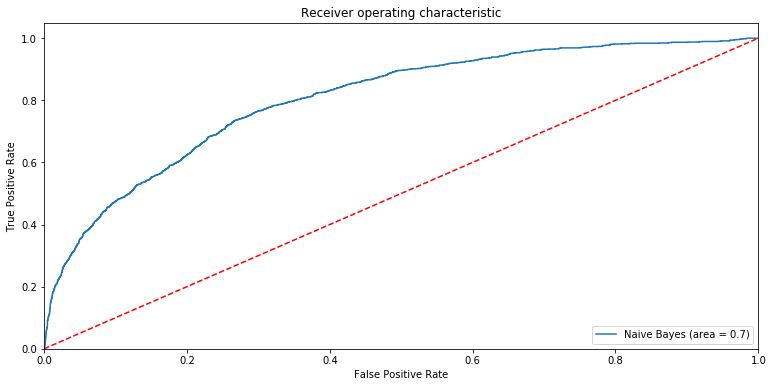

                                     Accuracy  Precision  Recall    f1
Logistic Regression Model                0.90       0.66    0.31  0.42
k-Nearest Neighbor Classifier Model      0.89       0.54    0.34  0.42
Naive Bayes Model                        0.83       0.34    0.53  0.42


In [24]:
# Naive Bayes Model
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

NB = GaussianNB()
NB.fit(X_train, y_train)

print('Naive Bayes \n\n')
print('NB accuracy for train set: {0:.2f}'.format(NB.score(X_train, y_train)))
print('NB accuracy for test set: {0:.2f}'.format(NB.score(X_test, y_test)))

y_true, y_pred = y_test, NB.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='d')

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
pre = precision_score(y_true, y_pred, average = 'binary', pos_label = 1)
rec = recall_score(y_true, y_pred, average = 'binary', pos_label = 1)
f1 = f1_score(y_true, y_pred, average = 'binary', pos_label = 1)
print('\nAccuracy Score:\n', auc.round(2))
print('Precision Score :\n ', pre.round(2))
print('Recall Score :\n ', rec.round(2))
print('f1 Score: \n', f1.round(2))

# ROC Curve
roc_auc = roc_auc_score(y_true, NB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, NB.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Naive Bayes (area = {})'.\
         format(roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

df1 = pd.DataFrame([auc.round(2), pre.round(2), rec.round(2), f1.round(2)], columns = ['Naive Bayes Model']).T
df1.columns = ['Accuracy', 'Precision', 'Recall', 'f1']
df = pd.concat([df, df1])
print(df)

Support Vector Classifier Scores


SVC accuracy for train set: 0.91
SVC accuracy for test set: 0.90

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.67      0.28      0.39      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.63      0.67     13564
weighted avg       0.88      0.90      0.88     13564


Confusion Matrix:
 [[11751   215]
 [ 1158   440]]

Accuracy Score:
 0.9


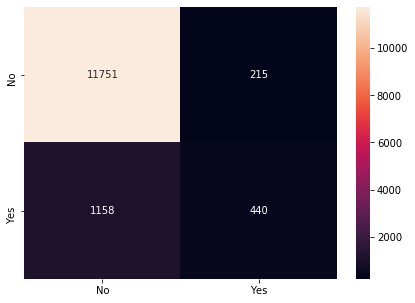

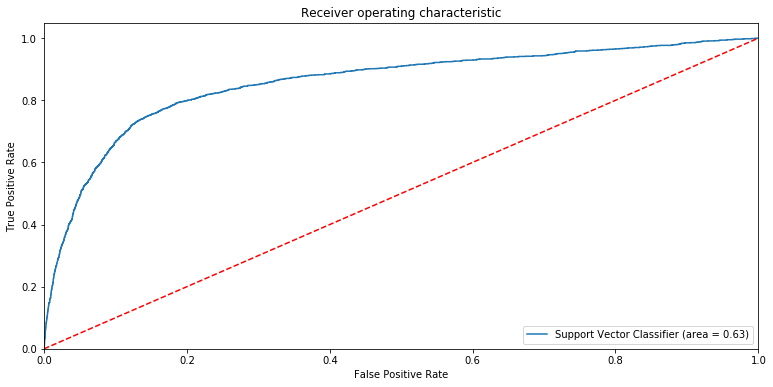

In [25]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = SVC(probability=True)
clf = clf.fit(X_train, y_train)

print('Support Vector Classifier Scores\n\n')
print('SVC accuracy for train set: {0:.2f}'.format(clf.score(X_train, y_train)))
print('SVC accuracy for test set: {0:.2f}'.format(clf.score(X_test, y_test)))

y_true, y_pred = y_test, clf.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(2))

# ROC Curve
roc_auc = roc_auc_score(y_true, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, clf.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Support Vector Classifier (area = {})'.\
         format(roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

In [28]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

dTree = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3)
dTree.fit(X_train, y_train)

(31647, 34) (13564, 34) (31647,) (13564,)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

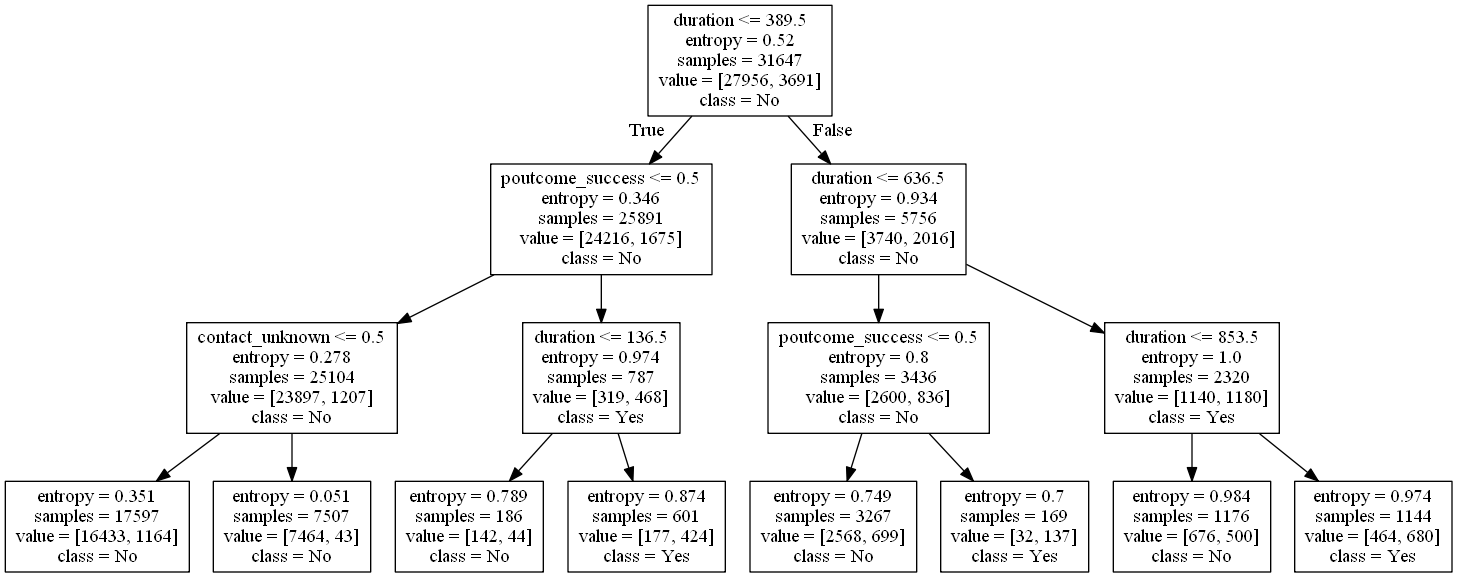

In [29]:
from IPython.display import Image  
import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']
bank_Tree_File = open('bank.dot','w')

dot_data = tree.export_graphviz(dTree, out_file=bank_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
bank_Tree_File.close()


retCode = system("dot -Tpng bank.dot -o bank.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("bank.png"))

Decision Tree accuracy for train set: 0.90
Decision Tree accuracy for test set: 0.90

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.62      0.33      0.43      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.65      0.69     13564
weighted avg       0.88      0.90      0.88     13564


Confusion Matrix:
 [[11647   319]
 [ 1072   526]]

Accuracy Score:
 0.9
Precision Score :
  0.62
Recall Score :
  0.33
f1 Score: 
 0.43


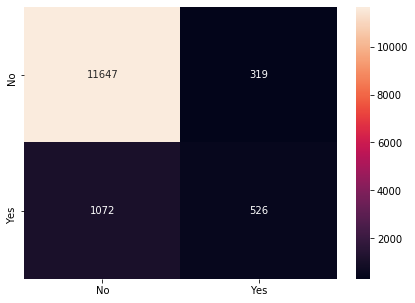

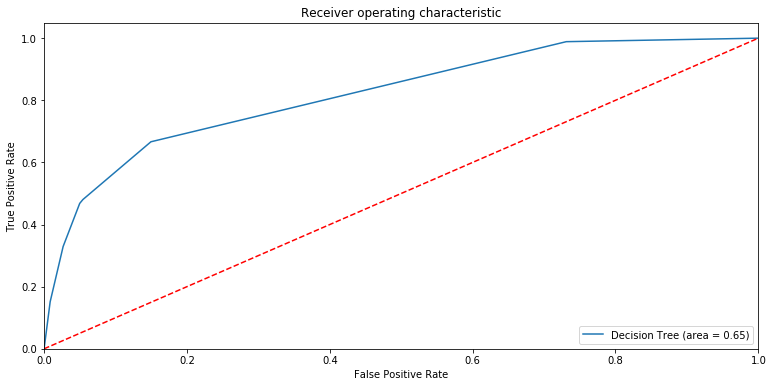

                                     Accuracy  Precision  Recall    f1
Logistic Regression Model                0.90       0.66    0.31  0.42
k-Nearest Neighbor Classifier Model      0.89       0.54    0.34  0.42
Naive Bayes Model                        0.83       0.34    0.53  0.42
Decision Tree Model                      0.90       0.62    0.33  0.43


In [30]:
print('Decision Tree accuracy for train set: {0:.2f}'.format(dTree.score(X_train, y_train)))
print('Decision Tree accuracy for test set: {0:.2f}'.format(dTree.score(X_test, y_test)))

y_true, y_pred = y_test, dTree.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='d')

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
pre = precision_score(y_true, y_pred, average = 'binary', pos_label = 1)
rec = recall_score(y_true, y_pred, average = 'binary', pos_label = 1)
f1 = f1_score(y_true, y_pred, average = 'binary', pos_label = 1)
print('\nAccuracy Score:\n', auc.round(2))
print('Precision Score :\n ', pre.round(2))
print('Recall Score :\n ', rec.round(2))
print('f1 Score: \n', f1.round(2))

# ROC Curve
roc_auc = roc_auc_score(y_true, dTree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, dTree.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Decision Tree (area = {})'.\
         format(roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

df1 = pd.DataFrame([auc.round(2), pre.round(2), rec.round(2), f1.round(2)], columns = ['Decision Tree Model']).T
df1.columns = ['Accuracy', 'Precision', 'Recall', 'f1']
df = pd.concat([df, df1])
print(df)

In [31]:
## Calculating feature importance
xvar = bankdf
feature_cols = xvar.columns
feat_importance = dTree.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, dTree.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
duration           0.586531
poutcome_success   0.317760
contact_unknown    0.095709
marital_married    0.000000
job_student        0.000000
job_technician     0.000000
job_unemployed     0.000000
job_unknown        0.000000
marital_divorced   0.000000
age                0.000000
marital_single     0.000000
job_self-employed  0.000000
contact_cellular   0.000000
contact_telephone  0.000000
poutcome_failure   0.000000
poutcome_other     0.000000
job_services       0.000000
job_retired        0.000000
education          0.000000
job_management     0.000000
job_housemaid      0.000000
job_entrepreneur   0.000000
job_blue-collar    0.000000
job_admin.         0.000000
previous           0.000000
pdays              0.000000
campaign           0.000000
month              0.000000
day                0.000000
loan               0.000000
housing            0.000000
balance            0.000000
default            0.000000
poutcome_unknown   0.000000

### Build the ensemble modelsand compare the results with the base models. Note: Random forest can be used only with Decision trees.

In [33]:
df

Accuracy  Precision  Recall    f1
Logistic Regression Model                0.90       0.66    0.31  0.42
k-Nearest Neighbor Classifier Model      0.89       0.54    0.34  0.42
Naive Bayes Model                        0.83       0.34    0.53  0.42
Decision Tree Model                      0.90       0.62    0.33  0.43

Random Forest Decision Tree accuracy for train set: 1.00
Random Forest Decision Tree accuracy for test set: 0.90

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.66      0.37      0.47      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564


Confusion Matrix:
 [[11655   311]
 [ 1006   592]]

Accuracy Score:
 0.9
Precision Score :
  0.66
Recall Score :
  0.37
f1 Score: 
 0.47


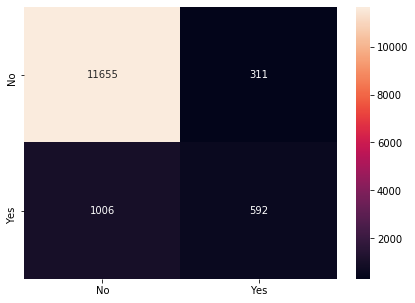

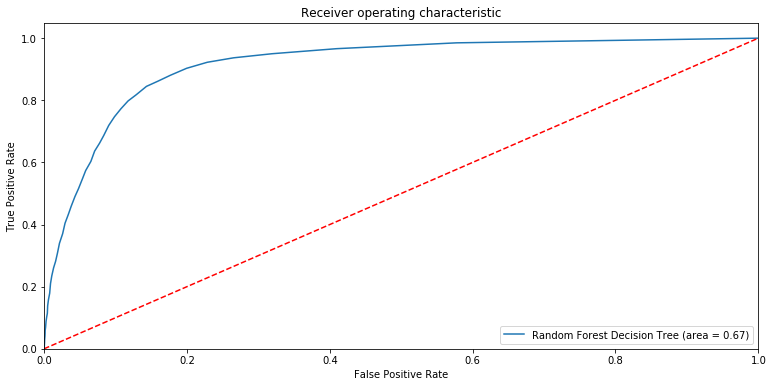

                                     Accuracy  Precision  Recall    f1
Logistic Regression Model                0.90       0.66    0.31  0.42
k-Nearest Neighbor Classifier Model      0.89       0.54    0.34  0.42
Naive Bayes Model                        0.83       0.34    0.53  0.42
Decision Tree Model                      0.90       0.62    0.33  0.43
Random Forest Decision Tree Model        0.90       0.66    0.37  0.47


In [34]:
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

print('Random Forest Decision Tree accuracy for train set: {0:.2f}'.format(rfcl.score(X_train, y_train)))
print('Random Forest Decision Tree accuracy for test set: {0:.2f}'.format(rfcl.score(X_test, y_test)))

y_true, y_pred = y_test, rfcl.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='d')

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
pre = precision_score(y_true, y_pred, average = 'binary', pos_label = 1)
rec = recall_score(y_true, y_pred, average = 'binary', pos_label = 1)
f1 = f1_score(y_true, y_pred, average = 'binary', pos_label = 1)
print('\nAccuracy Score:\n', auc.round(2))
print('Precision Score :\n ', pre.round(2))
print('Recall Score :\n ', rec.round(2))
print('f1 Score: \n', f1.round(2))

# ROC Curve
roc_auc = roc_auc_score(y_true, rfcl.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Random Forest Decision Tree (area = {})'.\
         format(roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()


df1 = pd.DataFrame([auc.round(2), pre.round(2), rec.round(2), f1.round(2)], columns = ['Random Forest Decision Tree Model']).T
df1.columns = ['Accuracy', 'Precision', 'Recall', 'f1']
df = pd.concat([df, df1])
print(df)

AdaBoost Classifier accuracy for train set: 1.00
AdaBoost Classifier accuracy for test set: 0.90

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11966
           1       0.62      0.32      0.42      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.65      0.68     13564
weighted avg       0.88      0.90      0.88     13564


Confusion Matrix:
 [[11648   318]
 [ 1084   514]]

Accuracy Score:
 0.9
Precision Score :
  0.62
Recall Score :
  0.32
f1 Score: 
 0.42


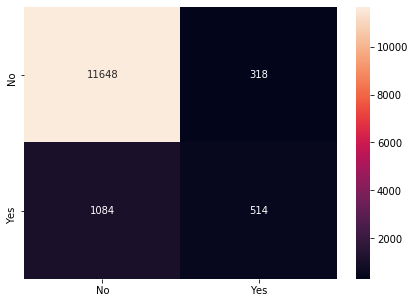

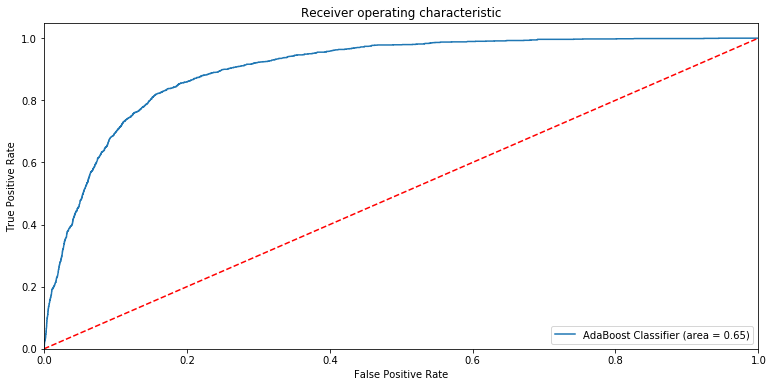

                                     Accuracy  Precision  Recall    f1
Logistic Regression Model                0.90       0.66    0.31  0.42
k-Nearest Neighbor Classifier Model      0.89       0.54    0.34  0.42
Naive Bayes Model                        0.83       0.34    0.53  0.42
Decision Tree Model                      0.90       0.62    0.33  0.43
Random Forest Decision Tree Model        0.90       0.66    0.37  0.47
AdaBoost Classifier Model                0.90       0.62    0.32  0.42


In [35]:
abcl = AdaBoostClassifier( n_estimators= 50, learning_rate=0.5, random_state=42)
abcl = abcl.fit(X_train, y_train)

print('AdaBoost Classifier accuracy for train set: {0:.2f}'.format(rfcl.score(X_train, y_train)))
print('AdaBoost Classifier accuracy for test set: {0:.2f}'.format(rfcl.score(X_test, y_test)))

y_true, y_pred = y_test, abcl.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='d')

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
pre = precision_score(y_true, y_pred, average = 'binary', pos_label = 1)
rec = recall_score(y_true, y_pred, average = 'binary', pos_label = 1)
f1 = f1_score(y_true, y_pred, average = 'binary', pos_label = 1)
print('\nAccuracy Score:\n', auc.round(2))
print('Precision Score :\n ', pre.round(2))
print('Recall Score :\n ', rec.round(2))
print('f1 Score: \n', f1.round(2))

# ROC Curve
roc_auc = roc_auc_score(y_true, abcl.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, abcl.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'AdaBoost Classifier (area = {})'.\
         format(roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

df1 = pd.DataFrame([auc.round(2), pre.round(2), rec.round(2), f1.round(2)], columns = ['AdaBoost Classifier Model']).T
df1.columns = ['Accuracy', 'Precision', 'Recall', 'f1']
df = pd.concat([df, df1])
print(df)

Bagging Classifier accuracy for train set: 0.99
Bagging Classifier accuracy for test set: 0.90

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11966
           1       0.61      0.45      0.52      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.70      0.73     13564
weighted avg       0.89      0.90      0.89     13564


Confusion Matrix:
 [[11517   449]
 [  884   714]]

Accuracy Score:
 0.9
Precision Score :
  0.61
Recall Score :
  0.45
f1 Score: 
 0.52


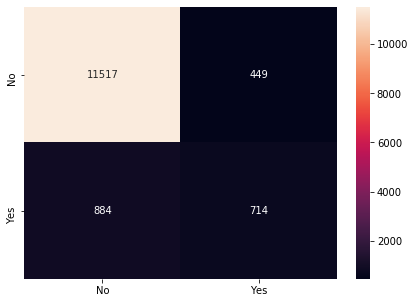

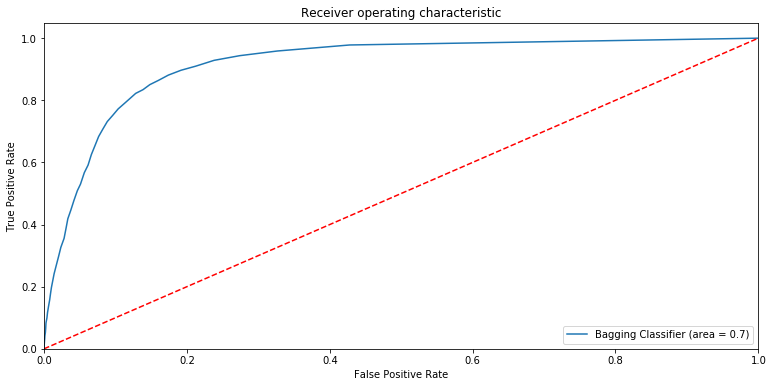

                                     Accuracy  Precision  Recall    f1
Logistic Regression Model                0.90       0.66    0.31  0.42
k-Nearest Neighbor Classifier Model      0.89       0.54    0.34  0.42
Naive Bayes Model                        0.83       0.34    0.53  0.42
Decision Tree Model                      0.90       0.62    0.33  0.43
Random Forest Decision Tree Model        0.90       0.66    0.37  0.47
AdaBoost Classifier Model                0.90       0.62    0.32  0.42
Bagging Classifier Model                 0.90       0.61    0.45  0.52


In [36]:
bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

print('Bagging Classifier accuracy for train set: {0:.2f}'.format(bgcl.score(X_train, y_train)))
print('Bagging Classifier accuracy for test set: {0:.2f}'.format(bgcl.score(X_test, y_test)))

y_true, y_pred = y_test, bgcl.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='d')

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
pre = precision_score(y_true, y_pred, average = 'binary', pos_label = 1)
rec = recall_score(y_true, y_pred, average = 'binary', pos_label = 1)
f1 = f1_score(y_true, y_pred, average = 'binary', pos_label = 1)
print('\nAccuracy Score:\n', auc.round(2))
print('Precision Score :\n ', pre.round(2))
print('Recall Score :\n ', rec.round(2))
print('f1 Score: \n', f1.round(2))

# ROC Curve
roc_auc = roc_auc_score(y_true, bgcl.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, bgcl.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Bagging Classifier (area = {})'.\
         format(roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

df1 = pd.DataFrame([auc.round(2), pre.round(2), rec.round(2), f1.round(2)], columns = ['Bagging Classifier Model']).T
df1.columns = ['Accuracy', 'Precision', 'Recall', 'f1']
df = pd.concat([df, df1])
print(df)

Gradient Boosting Classifier accuracy for train set: 0.91
Gradient Boosting Classifier accuracy for test set: 0.90

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.63      0.35      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564


Confusion Matrix:
 [[11643   323]
 [ 1043   555]]

Accuracy Score:
 0.9
Precision Score :
  0.63
Recall Score :
  0.35
f1 Score: 
 0.45


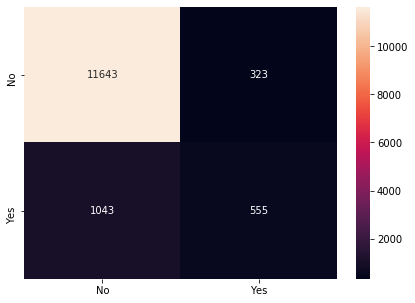

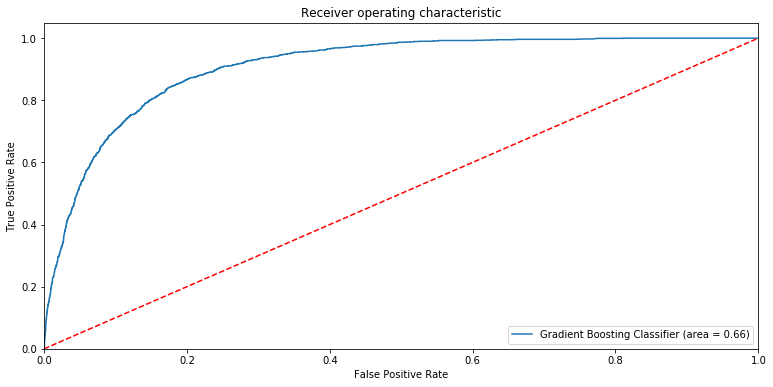

                                     Accuracy  Precision  Recall    f1
Logistic Regression Model                0.90       0.66    0.31  0.42
k-Nearest Neighbor Classifier Model      0.89       0.54    0.34  0.42
Naive Bayes Model                        0.83       0.34    0.53  0.42
Decision Tree Model                      0.90       0.62    0.33  0.43
Random Forest Decision Tree Model        0.90       0.66    0.37  0.47
AdaBoost Classifier Model                0.90       0.62    0.32  0.42
Bagging Classifier Model                 0.90       0.61    0.45  0.52
Gradient Boosting Classifier Model       0.90       0.63    0.35  0.45


In [37]:
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)

print('Gradient Boosting Classifier accuracy for train set: {0:.2f}'.format(gbcl.score(X_train, y_train)))
print('Gradient Boosting Classifier accuracy for test set: {0:.2f}'.format(gbcl.score(X_test, y_test)))

y_true, y_pred = y_test, gbcl.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='d')

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
pre = precision_score(y_true, y_pred, average = 'binary', pos_label = 1)
rec = recall_score(y_true, y_pred, average = 'binary', pos_label = 1)
f1 = f1_score(y_true, y_pred, average = 'binary', pos_label = 1)
print('\nAccuracy Score:\n', auc.round(2))
print('Precision Score :\n ', pre.round(2))
print('Recall Score :\n ', rec.round(2))
print('f1 Score: \n', f1.round(2))

# ROC Curve
roc_auc = roc_auc_score(y_true, gbcl.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, gbcl.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Gradient Boosting Classifier (area = {})'.\
         format(roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

df1 = pd.DataFrame([auc.round(2), pre.round(2), rec.round(2), f1.round(2)], columns = ['Gradient Boosting Classifier Model']).T
df1.columns = ['Accuracy', 'Precision', 'Recall', 'f1']
df = pd.concat([df, df1])
print(df)

Extreme Gradient Boosting Classifier accuracy for train set: 0.96
Extreme Gradient Boosting Classifier accuracy for test set: 0.91

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11966
           1       0.64      0.49      0.55      1598

    accuracy                           0.91     13564
   macro avg       0.79      0.72      0.75     13564
weighted avg       0.90      0.91      0.90     13564


Confusion Matrix:
 [[11522   444]
 [  820   778]]

Accuracy Score:
 0.91
Precision Score :
  0.64
Recall Score :
  0.49
f1 Score: 
 0.55


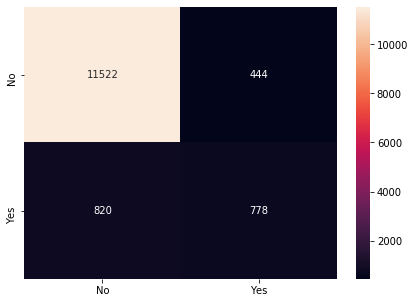

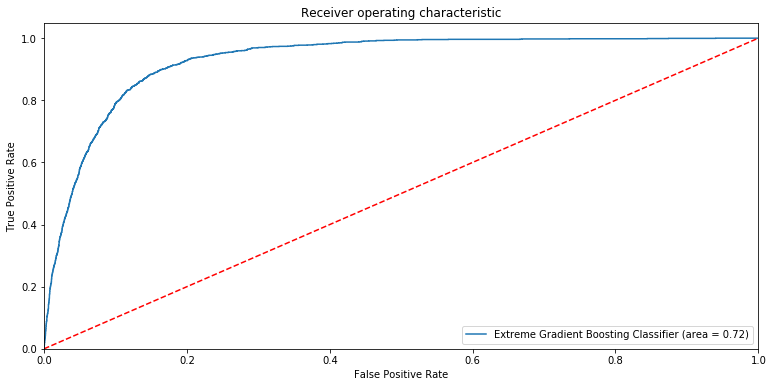

                                            Accuracy  Precision  Recall    f1
Logistic Regression Model                       0.90       0.66    0.31  0.42
k-Nearest Neighbor Classifier Model             0.89       0.54    0.34  0.42
Naive Bayes Model                               0.83       0.34    0.53  0.42
Decision Tree Model                             0.90       0.62    0.33  0.43
Random Forest Decision Tree Model               0.90       0.66    0.37  0.47
AdaBoost Classifier Model                       0.90       0.62    0.32  0.42
Bagging Classifier Model                        0.90       0.61    0.45  0.52
Gradient Boosting Classifier Model              0.90       0.63    0.35  0.45
Extreme Gradient Boosting Classifier Model      0.91       0.64    0.49  0.55


In [38]:
xgb = XGBClassifier(n_estimators=100)

xgb = xgb.fit(X_train, y_train)

print('Extreme Gradient Boosting Classifier accuracy for train set: {0:.2f}'.format(xgb.score(X_train, y_train)))
print('Extreme Gradient Boosting Classifier accuracy for test set: {0:.2f}'.format(xgb.score(X_test, y_test)))

y_true, y_pred = y_test, xgb.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='d')

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
pre = precision_score(y_true, y_pred, average = 'binary', pos_label = 1)
rec = recall_score(y_true, y_pred, average = 'binary', pos_label = 1)
f1 = f1_score(y_true, y_pred, average = 'binary', pos_label = 1)
print('\nAccuracy Score:\n', auc.round(2))
print('Precision Score :\n ', pre.round(2))
print('Recall Score :\n ', rec.round(2))
print('f1 Score: \n', f1.round(2))

# ROC Curve
roc_auc = roc_auc_score(y_true, xgb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, xgb.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Extreme Gradient Boosting Classifier (area = {})'.\
         format(roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

df1 = pd.DataFrame([auc.round(2), pre.round(2), rec.round(2), f1.round(2)], columns = ['Extreme Gradient Boosting Classifier Model']).T
df1.columns = ['Accuracy', 'Precision', 'Recall', 'f1']
df = pd.concat([df, df1])
print(df)

Light Gradient Boosting Classifier accuracy for train set: 0.93
Light Gradient Boosting Classifier accuracy for test set: 0.91

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11966
           1       0.65      0.48      0.55      1598

    accuracy                           0.91     13564
   macro avg       0.79      0.72      0.75     13564
weighted avg       0.90      0.91      0.90     13564


Confusion Matrix:
 [[11543   423]
 [  826   772]]

Accuracy Score:
 0.91
Precision Score :
  0.65
Recall Score :
  0.48
f1 Score: 
 0.55


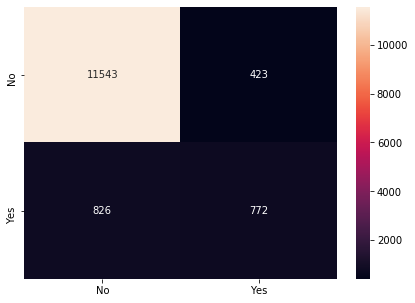

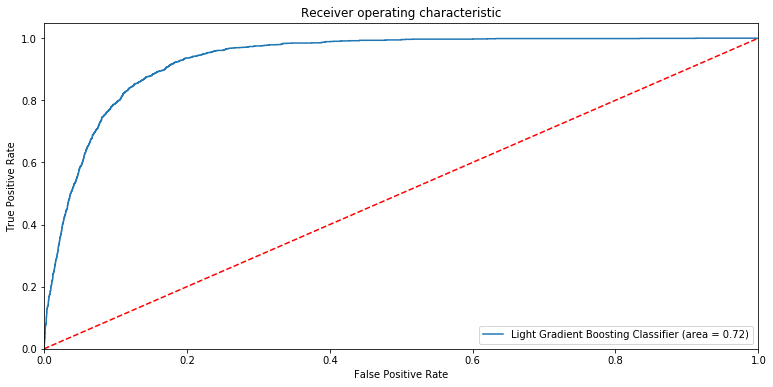

                                            Accuracy  Precision  Recall    f1
Logistic Regression Model                       0.90       0.66    0.31  0.42
k-Nearest Neighbor Classifier Model             0.89       0.54    0.34  0.42
Naive Bayes Model                               0.83       0.34    0.53  0.42
Decision Tree Model                             0.90       0.62    0.33  0.43
Random Forest Decision Tree Model               0.90       0.66    0.37  0.47
AdaBoost Classifier Model                       0.90       0.62    0.32  0.42
Bagging Classifier Model                        0.90       0.61    0.45  0.52
Gradient Boosting Classifier Model              0.90       0.63    0.35  0.45
Extreme Gradient Boosting Classifier Model      0.91       0.64    0.49  0.55
Light Gradient Boosting Classifier  Model       0.91       0.65    0.48  0.55


In [39]:
lgb = LGBMClassifier(subsample=0.75)

lgb = lgb.fit(X_train, y_train)

print('Light Gradient Boosting Classifier accuracy for train set: {0:.2f}'.format(lgb.score(X_train, y_train)))
print('Light Gradient Boosting Classifier accuracy for test set: {0:.2f}'.format(lgb.score(X_test, y_test)))

y_true, y_pred = y_test, lgb.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='d')

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
pre = precision_score(y_true, y_pred, average = 'binary', pos_label = 1)
rec = recall_score(y_true, y_pred, average = 'binary', pos_label = 1)
f1 = f1_score(y_true, y_pred, average = 'binary', pos_label = 1)
print('\nAccuracy Score:\n', auc.round(2))
print('Precision Score :\n ', pre.round(2))
print('Recall Score :\n ', rec.round(2))
print('f1 Score: \n', f1.round(2))

# ROC Curve
roc_auc = roc_auc_score(y_true, lgb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, lgb.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Light Gradient Boosting Classifier (area = {})'.\
         format(roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

df1 = pd.DataFrame([auc.round(2), pre.round(2), rec.round(2), f1.round(2)], columns = ['Light Gradient Boosting Classifier  Model']).T
df1.columns = ['Accuracy', 'Precision', 'Recall', 'f1']
df = pd.concat([df, df1])
print(df)



Categorical Variables indices :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]

 Training CatBoost Model..........
Learning rate set to 0.5
0:	learn: 0.3877413	total: 21.2ms	remaining: 1.04s
1:	learn: 0.2815134	total: 43.9ms	remaining: 1.05s
2:	learn: 0.2458780	total: 69.5ms	remaining: 1.09s
3:	learn: 0.2376803	total: 93.6ms	remaining: 1.08s
4:	learn: 0.2299728	total: 115ms	remaining: 1.04s
5:	learn: 0.2258819	total: 137ms	remaining: 1s
6:	learn: 0.2224983	total: 163ms	remaining: 1s
7:	learn: 0.2199345	total: 187ms	remaining: 981ms
8:	learn: 0.2184987	total: 219ms	remaining: 1000ms
9:	learn: 0.2164256	total: 244ms	remaining: 976ms
10:	learn: 0.2155992	total: 267ms	remaining: 947ms
11:	learn: 0.2147081	total: 290ms	remaining: 917ms
12:	learn: 0.2135655	total: 310ms	remaining: 882ms
13:	learn: 0.2125381	total: 331ms	remaining: 851ms
14:	learn: 0.2119990	total: 358ms	remaining: 835ms
15:	learn: 0.2110013	total: 392ms	remaining: 8

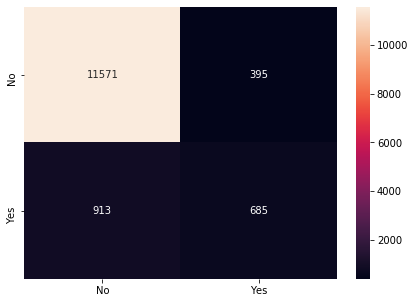

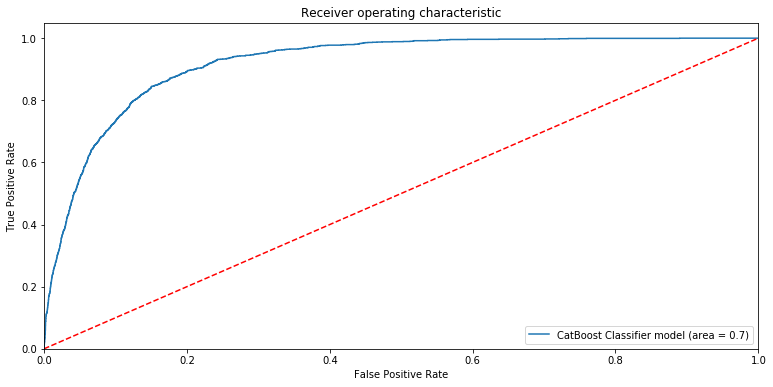

                                            Accuracy  Precision  Recall    f1
Logistic Regression Model                       0.90       0.66    0.31  0.42
k-Nearest Neighbor Classifier Model             0.89       0.54    0.34  0.42
Naive Bayes Model                               0.83       0.34    0.53  0.42
Decision Tree Model                             0.90       0.62    0.33  0.43
Random Forest Decision Tree Model               0.90       0.66    0.37  0.47
AdaBoost Classifier Model                       0.90       0.62    0.32  0.42
Bagging Classifier Model                        0.90       0.61    0.45  0.52
Gradient Boosting Classifier Model              0.90       0.63    0.35  0.45
Extreme Gradient Boosting Classifier Model      0.91       0.64    0.49  0.55
Light Gradient Boosting Classifier  Model       0.91       0.65    0.48  0.55
CatBoost Classifier model                       0.90       0.63    0.43  0.51


In [60]:
# find out the indices of categorical variables
categorical_var = np.where(X_train.dtypes != np.float)[0]
print('\nCategorical Variables indices : ',categorical_var)

print('\n Training CatBoost Model..........')
'''
Create the object of the CatBoost Classifier model
You can also add other parameters and test your code here
Some parameters are : l2_leaf, model_size
Documentation of sklearn CatBoostClassifier: 

https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html
'''
model = CatBoostClassifier(iterations=50)

# fit the model with the training data
model.fit(X_train,y_train,cat_features = categorical_var,plot=False)
print('\n Model Trainied')

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)

# Classification Report
print('\n {}'.format(classification_report(y_test, predict_test)))

# Confusion Matrix
cm = confusion_matrix(y_test, predict_test)
print('\nConfusion Matrix:\n', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='d')

# Accuracy Score
auc = accuracy_score(y_test, predict_test)
pre = precision_score(y_test, predict_test, average = 'binary', pos_label = 1)
rec = recall_score(y_test, predict_test, average = 'binary', pos_label = 1)
f1 = f1_score(y_test, predict_test, average = 'binary', pos_label = 1)
print('\nAccuracy Score:\n', auc.round(2))
print('Precision Score :\n ', pre.round(2))
print('Recall Score :\n ', rec.round(2))
print('f1 Score: \n', f1.round(2))

# ROC Curve
roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'CatBoost Classifier model (area = {})'.\
         format(roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

df1 = pd.DataFrame([auc.round(2), pre.round(2), rec.round(2), f1.round(2)], columns = ['CatBoost Classifier model']).T
df1.columns = ['Accuracy', 'Precision', 'Recall', 'f1']
df = pd.concat([df, df1])
print(df)

### Compare performances of all the models

The classification goal is to predict if the client will subscribe (yes/no) a term deposit.

ML models works best when the number of classes are in equal proportion since they are designed to maximize accuracy and reduce error. In our dataset, the clients subscribing to term deposit (class 'yes' i.e. 1) is 12% whereas those about 88% of the clients didn't subscribe (class 'no' i.e. 0) to the term deposit.


* **Accuracy** : Model can predict at X% accurary the total number of customers subscribing+not-subscribing for bank term deposit vs total number of customers. Since the target distribution is skewed and imbalanced, Accuracy wont be good metric.

    Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. 
    

* **Recall** : Model can predict at X% the number of customers subscribed for bank term deposit among the total number of customers who will actually subscribe for bank term deposit
* **Precision** : Model can predict at X%, among all the predicted customers subscribed for bank term deposit, how many actually subscribed for bank term deposit.

In [61]:
df.sort_values(by=['Recall'], inplace=True)

In [62]:
df

Accuracy  Precision  Recall    f1
Logistic Regression Model                       0.90       0.66    0.31  0.42
AdaBoost Classifier Model                       0.90       0.62    0.32  0.42
Decision Tree Model                             0.90       0.62    0.33  0.43
k-Nearest Neighbor Classifier Model             0.89       0.54    0.34  0.42
Gradient Boosting Classifier Model              0.90       0.63    0.35  0.45
Random Forest Decision Tree Model               0.90       0.66    0.37  0.47
CatBoost Classifier model                       0.90       0.63    0.43  0.51
Bagging Classifier Model                        0.90       0.61    0.45  0.52
Light Gradient Boosting Classifier  Model       0.91       0.65    0.48  0.55
Extreme Gradient Boosting Classifier Model      0.91       0.64    0.49  0.55
Naive Bayes Model                               0.83       0.34    0.53  0.42

### I am choosing Naive Bayes Model since Recall score is highest among all other models. 

In [69]:
#Getting the pandas profiling report 
import pandas_profiling 
pandas_profiling.ProfileReport(bankdf)

In [70]:
#Getting an html file as output here 
pandas_profiling.ProfileReport(bankdf).to_file('Bank.html')